In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import joblib
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [194]:
df=pd.read_csv('/content/drive/MyDrive/Hackathon/IIT Madras/Permanent/final_table_when_alyal_came.csv')

In [195]:
df

,Unnamed: 0,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,total_runs_cum,whole_runs,whole_runs_per_venue_season_innings
0,0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,1,222,156.580796
1,1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,222,156.580796
2,2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,222,156.580796
3,3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,222,156.580796
4,4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,222,156.580796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194349,194349,1254059,2021,2021-04-10,Wankhede Stadium,2,17.6,Delhi Capitals,Chennai Super Kings,MP Stoinis,RR Pant,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,182,190,190.000000
194350,194350,1254059,2021,2021-04-10,Wankhede Stadium,2,18.1,Delhi Capitals,Chennai Super Kings,MP Stoinis,RR Pant,SN Thakur,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,186,190,190.000000
194351,194351,1254059,2021,2021-04-10,Wankhede Stadium,2,18.2,Delhi Capitals,Chennai Super Kings,MP Stoinis,RR Pant,SN Thakur,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,186,190,190.000000
194352,194352,1254059,2021,2021-04-10,Wankhede Stadium,2,18.3,Delhi Capitals,Chennai Super Kings,MP Stoinis,RR Pant,SN Thakur,0,0,NaN,NaN,NaN,NaN,NaN,caught,MP Stoinis,NaN,NaN,0,186,190,190.000000


In [196]:
df=df.drop(labels='season',axis=1)

In [197]:
df=df.drop(labels=['Unnamed: 0','striker', 'non_striker', 'bowler', 'wides','noballs', 'byes', 'legbyes', 'penalty', 'wicket_type','player_dismissed', 'other_wicket_type', 'other_player_dismissed' ,'total_runs','runs_off_bat','extras','whole_runs'],axis=1)

In [198]:
consistent_team=['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Mumbai Indians','Sunrisers Hyderabad','Delhi Capitals']

In [199]:
df = df[(df['batting_team'].isin(consistent_team)) & (df['bowling_team'].isin(consistent_team))]

In [200]:
df=df[df['innings']<=2]

In [201]:
df=df.drop(labels=['match_id'],axis=1)

In [202]:
df=df.drop(labels=['venue'],axis=1)

In [203]:
df

,start_date,innings,ball,batting_team,bowling_team,total_runs_cum,whole_runs_per_venue_season_innings
0,2008-04-18,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,1,156.580796
1,2008-04-18,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,1,156.580796
2,2008-04-18,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,2,156.580796
3,2008-04-18,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,2,156.580796
4,2008-04-18,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,2,156.580796
...,...,...,...,...,...,...,...
194349,2021-04-10,2,17.6,Delhi Capitals,Chennai Super Kings,182,190.000000
194350,2021-04-10,2,18.1,Delhi Capitals,Chennai Super Kings,186,190.000000
194351,2021-04-10,2,18.2,Delhi Capitals,Chennai Super Kings,186,190.000000
194352,2021-04-10,2,18.3,Delhi Capitals,Chennai Super Kings,186,190.000000


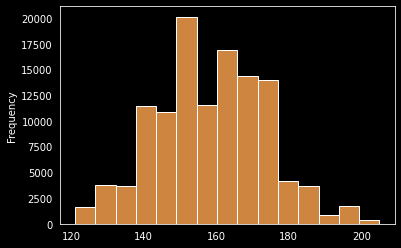

In [204]:
plt.style.use("dark_background")
df.whole_runs_per_venue_season_innings.plot(kind='hist',color='peru',bins=15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


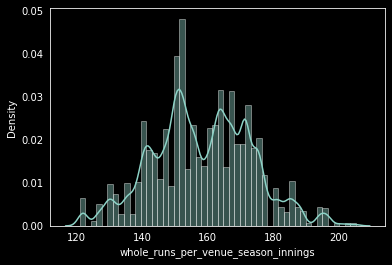

In [205]:
sns.distplot(df.whole_runs_per_venue_season_innings)


In [206]:
df['bins'] = pd.cut(x=df['whole_runs_per_venue_season_innings'], bins= 15,labels=['bin1','bin2','bin3','bin4','bin5','bin6','bin7','bin8','bin9','bin10','bin11','bin12','bin13','bin14','bin15'])

In [207]:
print(df['bins'].unique())

['bin7', 'bin3', 'bin12', 'bin8', 'bin4', ..., 'bin10', 'bin15', 'bin11', 'bin13', 'bin14']
Length: 15
Categories (15, object): ['bin1' < 'bin2' < 'bin3' < 'bin4' ... 'bin12' < 'bin13' < 'bin14' < 'bin15']


In [208]:
df.to_csv('/content/drive/MyDrive/Hackathon/IIT Madras/Permanent/binned.csv')

In [209]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kings XI Punjab',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Delhi Capitals'],
      dtype=object)

In [210]:
df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Delhi Capitals'],
      dtype=object)

In [211]:
team_encoder = LabelEncoder()
df['batting_team'] = team_encoder.fit_transform(df['batting_team'])
df['bowling_team'] = team_encoder.fit_transform(df['bowling_team'])

In [212]:
df=df.drop(labels='whole_runs_per_venue_season_innings',axis=1)

In [213]:
bin_encoder = LabelEncoder()
df['bins'] = bin_encoder.fit_transform(df['bins'])

In [214]:
df

,start_date,innings,ball,batting_team,bowling_team,total_runs_cum,bins
0,2008-04-18,1,0.1,3,6,1,12
1,2008-04-18,1,0.2,3,6,1,12
2,2008-04-18,1,0.3,3,6,2,12
3,2008-04-18,1,0.4,3,6,2,12
4,2008-04-18,1,0.5,3,6,2,12
...,...,...,...,...,...,...,...
194349,2021-04-10,2,17.6,1,0,182,4
194350,2021-04-10,2,18.1,1,0,186,4
194351,2021-04-10,2,18.2,1,0,186,4
194352,2021-04-10,2,18.3,1,0,186,4


In [215]:
df['start_date'] = df['start_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [216]:
X_train = df.drop(labels='total_runs_cum', axis=1)[df['start_date'].dt.year <= 2016]
X_test =  df.drop(labels='total_runs_cum', axis=1)[df['start_date'].dt.year >= 2017]

y_train =df[df['start_date'].dt.year <= 2016]['total_runs_cum'].values
y_test = df[df['start_date'].dt.year >= 2017]['total_runs_cum'].values

In [217]:
X_train.drop(labels='start_date',axis=1,inplace=True)
X_test.drop(labels='start_date',axis=1,inplace=True)

In [218]:
X_train

,innings,ball,batting_team,bowling_team,bins
0,1,0.1,3,6,12
1,1,0.2,3,6,12
2,1,0.3,3,6,12
3,1,0.4,3,6,12
4,1,0.5,3,6,12
...,...,...,...,...,...
135346,2,16.2,2,4,0
135347,2,16.3,2,4,0
135348,2,16.4,2,4,0
135349,2,16.5,2,4,0


In [219]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
pred=rfr.predict(X_test)
print(r2_score(y_test,pred))

0.8225266418368893


In [222]:
joblib.dump(rfr,'/content/drive/MyDrive/Hackathon/IIT Madras/Permanent/regressor_model.joblib')
joblib.dump(team_encoder,'/content/drive/MyDrive/Hackathon/IIT Madras/Permanent/team_encoder.joblib')
joblib.dump(bin_encoder,'/content/drive/MyDrive/Hackathon/IIT Madras/Permanent/bin_encoder.joblib')

['/content/drive/MyDrive/Hackathon/IIT Madras/Permanent/bin_encoder.joblib']